In [2]:
# Load working packages
print('Loading packages', flush=True)
import numpy as np
import pandas as pd
import pickle

# Load drawing packages
import matplotlib.pyplot as plt
from matplotlib.patches import Patch, Rectangle
from matplotlib.lines import Line2D
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

# Load dendrogram packages
from scipy.cluster import hierarchy
import scipy.spatial.distance as ssd
import seaborn as sns
print('All done', flush=True)

Loading packages
All done


In [7]:
# Load data
print('Loading files', flush=True)
with open('balsojumi_dataframes.pkl', 'rb') as f:
    balsojumi_dataframes = pickle.load(f)
with open('registracijas_dataframes.pkl', 'rb') as f:
    registracijas_dataframes = pickle.load(f)
print('All done', flush=True)

Loading files
All done


In [8]:
# Initialize new data structures
balsojumi = list(balsojumi_dataframes.keys())          # list of voting events
registracijas = list(registracijas_dataframes.keys())   # list of voting events
deputati = []                                          # list of members of parliament
deputatu_balsojumi = {}                                # key = 'deputats', value = {key = type of vote, value = list of strings when voted this way}
deputatu_partijas = {}                                 # key = 'deputats', value = {key = name of party, value = list of strings when voted as member of this party}

partijas = ['JV', 'ZZS', 'AS', 'NA', 'ST!', 'PRO', 'LPV', ' ']
partijas_krasas = {'JV':'C8', 'ZZS':'C2', 'AS':'C6', 'NA':'C3', 'ST!':'C1', 'PRO':'C4', 'LPV':'C5', ' ':'C7'}
partijas_krasas_alt = {
    'JV':plt.get_cmap('tab20')(17/20), 'ZZS':plt.get_cmap('tab20')(5/20), 'AS':plt.get_cmap('tab20')(13/20), 'NA':plt.get_cmap('tab20')(7/20),
     'ST!':plt.get_cmap('tab20')(3/20), 'PRO':plt.get_cmap('tab20')(9/20), 'LPV':plt.get_cmap('tab20')(11/20), ' ':plt.get_cmap('tab20')(15/20)
     }
partijas_krasas_dark = {'JV':'C0', 'ZZS':'C1', 'AS':'C2', 'NA':'C3', 'ST!':'C4', 'PRO':'C5', 'LPV':'C6', ' ':'C7'}

# Iterate through dictionaries
for data_dict in [registracijas_dataframes, balsojumi_dataframes]:
    for event in list(data_dict.keys()):
        df = data_dict[event]

        # Iterate through rows
        for row_index in range(df.shape[0]):
            row = df.iloc[row_index]
            deputats = row['name']
            partija = row['party']
            balss = row['vote']

            # Make sure in list 'deputati'
            if deputats not in deputati:
                deputati.append(deputats)

            # Make sure in dictionary 'deputatu_balsojumi'
            if deputats not in deputatu_balsojumi.keys():
                deputatu_balsojumi[deputats] = {'Nereģistrējies':[], 'Reģistrējies':[], 'Nebalsoja':[], 'Atturas':[], 'Pret':[], 'Par':[]}
            else:
                deputatu_balsojumi[deputats][balss].append(event)

            # Make sure in dictionary 'deputatu_partijas'
            if deputats not in deputatu_partijas.keys():
                deputatu_partijas[deputats] = {'JV':[], 'ZZS':[], 'AS':[], 'NA':[], 'ST!':[], 'PRO':[], 'LPV':[], ' ':[]}
            else:
                deputatu_partijas[deputats][partija].append(event)

# Print Results
print('0. There are 43 sedes from 01.11.2022 to 29.03.2023')
print('1. There are '+str(len(deputati))+' deputati')
print('2. There are '+str(len(partijas))+' political parties')
print('3. There are '+str(len(registracijas))+' registration events')
print('4. There are '+str(len(balsojumi))+' voting events')

0. There are 43 sedes from 01.11.2022 to 29.03.2023
1. There are 116 deputati
2. There are 8 political parties
3. There are 72 registration events
4. There are 826 voting events


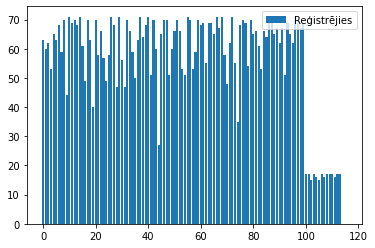

In [ ]:
##
## Visual 1: Who doesn't bother coming in to work?
##  - type: stacked bar chart
##  - x-axis: name of 'deputats'
##  - y-axis: percent
##
## Comments:
##  - sort in x-direction by percent of 'sedes' for which 'deputats' was neregistrejies, starting with highest
##  - the y-axis is a percentage, because different 'deputati' have been eligible to vote for different numbers of 'sedes'
##  - bonus: color in each bar by the color of the party of the 'deputats'

fig = plt.figure(facecolor='w')
ax = plt.gca()

reg = [len(deputatu_balsojumi[deputats]['Reģistrējies']) for deputats in deputati]
nereg = [len(deputatu_balsojumi[deputats]['Nereģistrējies']) for deputats in deputati]

# Percentage 'registrejies'
ax.bar(range(116), reg, label='Reģistrējies')

# Percentage 'neregistrejies'
# ax.bar(..., bottom=..., label='Nereģistrējies')

# Consider cutting off past a certain number
# ax.set_xlim([0,...])

# Show plot
ax.legend()
plt.show()

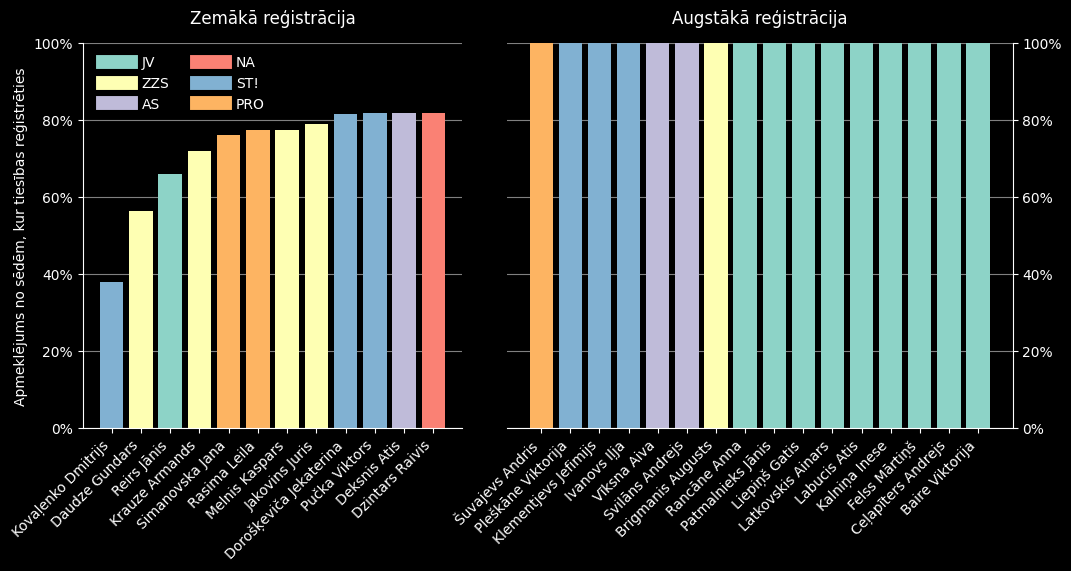

In [ ]:
##
## Visual 1N
##

# Remove trivial deputati
deputati_relevant = np.copy(np.array(deputati))
for deputats in ['Tretjakova Nadežda', 'Skujiņa Zane',
                 'Mūrniece Ināra', 'Vitenbergs Jānis',
                 'Lībiņa-Egnere Inese', 'Rinkēvičs Edgars',
                 'Indriksone Ilze', 'Ašeradens Arvils',
                 'Kučinskis Māris', 'Čakša Anda',
                 'Puntulis Nauris', 'Siliņa Evika',colahttps://start.ubuntu-mate.org
                 'Vitenbergs Jānis', 'Menģelsone Līga',
                 'Sprindžuks Māris', 'Šmits Didzis',
                 'Čudars Raimonds']:
    deputati_relevant = np.delete(deputati_relevant, np.where(deputati_relevant == deputats)[0])

# Collect data about reģistrējies, nereģistrējies, tiesīgs reģistrēties
reg = np.array([len(deputatu_balsojumi[deputats]['Reģistrējies']) for deputats in deputati_relevant])
nereg = np.array([len(deputatu_balsojumi[deputats]['Nereģistrējies']) for deputats in deputati_relevant])
tiesreg = np.array([reg[d]+nereg[d] for d in range(len(deputati_relevant))])
reg_rel = reg/tiesreg

# Sort and set cutoffs
reg_rel_sortindex = np.argsort(reg_rel)
reg_rel = np.sort(reg_rel)
cutoff_worst = 12
cutoff_best = 16

# Get main deputatu partija
deputata_partija = {deputats:partijas[np.argmax(np.array([len(deputatu_partijas[deputats][partija]) for partija in partijas]))] for deputats in deputati}

with plt.style.context('dark_background'):
    fig,axes = plt.subplots(1,2,figsize=(12,5), width_ratios=[cutoff_worst/(cutoff_worst+cutoff_best), cutoff_best/(cutoff_worst+cutoff_best)])

    # Most 'nereģistrējies'
    dep_worst = np.array(deputati_relevant)[reg_rel_sortindex][:cutoff_worst]
    ax = axes[0]
    ax.set_title('Zemākā reģistrācija', y=1.03)
    ax.bar(range(cutoff_worst), reg_rel[:cutoff_worst], color=[partijas_krasas_dark[deputata_partija[deputats]] for deputats in dep_worst], zorder=2)

    # Ticks
    ax.set_xticks(range(cutoff_worst))
    ax.set_xticklabels(dep_worst, rotation=45, ha='right')
    ax.set_yticks([i*.2 for i in range(6)])
    ax.set_yticklabels([str(i*20)+'%' for i in range(6)])
    ax.set_ylabel('Apmeklējums no sēdēm, kur tiesības reģistrēties')
    ax.spines[['top','right']].set_visible(False)

  # Text of how many eligible for
  # for i in range(cutoff_worst):
  #   ax.text(i, reg_rel[np.where(deputati_relevant[reg_rel_sortindex] == dep_worst[i])[0][0]]+.01,
  #           str(tiesreg[np.where(deputati_relevant == dep_worst[i])[0][0]]), va='bottom', ha='center', color=partijas_krasas_dark[deputata_partija[dep_worst[i]]])

    # Most 'reģistrējies'
    dep_order = np.array([7,9,0,12,1,10,6,13,8,14,4,3,5,15,11,2])
    dep_best = np.array(deputati_relevant)[reg_rel_sortindex][::-1][:cutoff_best][::-1][dep_order]
    ax = axes[1]
    ax.set_title('Augstākā reģistrācija', y=1.03)
    ax.bar(range(cutoff_best), reg_rel[::-1][:cutoff_best][::-1], color=[partijas_krasas_dark[deputata_partija[deputats]] for deputats in dep_best], zorder=2)

    # Ticks
    ax.set_xticks(range(cutoff_best))
    ax.set_xticklabels(dep_best, rotation=45, ha='right')
    ax.yaxis.tick_right()
    ax.set_yticks([i*.2 for i in range(6)])
    ax.set_yticklabels([str(i*20)+'%' for i in range(6)])
    ax.spines[['top','left']].set_visible(False)

  # Text of how many eligible for
  # for i in range(cutoff_best):
  #   ax.text(i, .99, str(tiesreg[np.where(deputati_relevant == dep_best[i])[0][0]]), va='top', ha='center', color=(0,0,0))

    # Style
    for ax in axes:
        ax.set_ylim([0,1])
        ax.grid(axis='y', zorder=-2, color=(.5,.5,.5))

    # Custom legend
    legend_elements = [Line2D([0], [0], color=partijas_krasas_dark[partija], lw=10, label=partija) for partija in partijas[:-2]]
    axes[0].legend(handles=legend_elements, loc='upper left', ncol=2, frameon=False, bbox_to_anchor=(.02,1))

    # Show plot
    plt.subplots_adjust(wspace=.1)
    plt.show()

In [ ]:
##
## Visual 2: Who doesn't bother having a real opinion?
##  - type: two bar charts
##  - x-axis: name of 'deputats'
##  - y-axis: nonnegative ineteger
##
## Comments:
##  - two rows, top row for 'Nebalsoja', bottom row for 'Atturas'
##  - sort in x-direction by number of 'sedes' for which 'deputats' voted 'nebalsoja', starting with highest
##  - the y-axis is a number, because every day of coming in to work and not doing work is important to recognize
##

fig, axes = plt.subplots(facecolor='w')

# Top row: Nebalsoja
ax = axes[0]
ax.bar(...)

# Bottom row: Atturas
ax = axes[1]
ax.bar(...)

# Consider cutting off past a certain number
for ax in axes:
    ax.set_xlim([0,...])

# Show plot
plt.show()

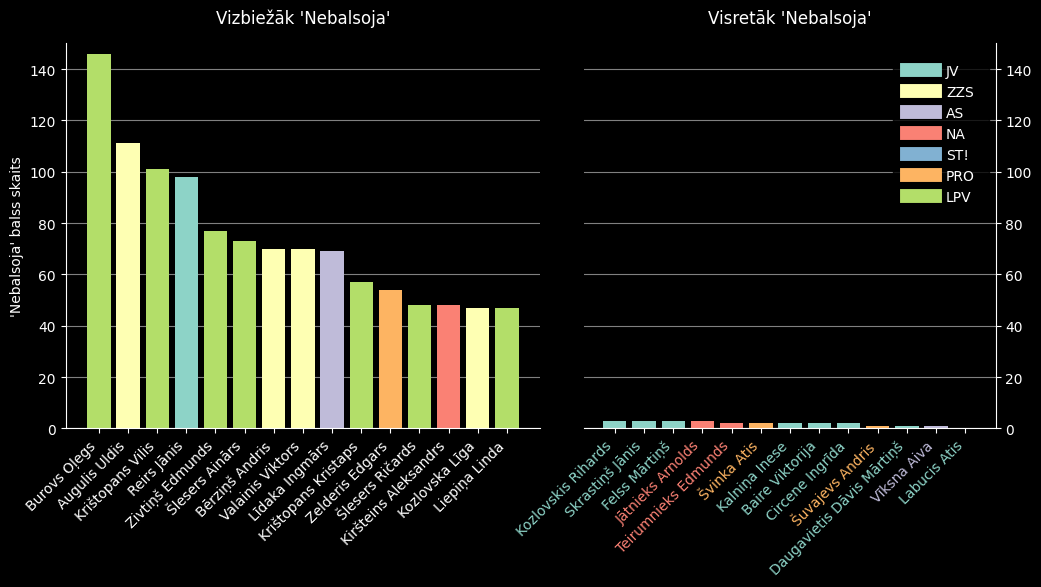

In [ ]:
##
## Visual 2N
##

# Remove trivial deputati
deputati_relevant = np.copy(np.array(deputati))
for deputats in ['Tretjakova Nadežda', 'Skujiņa Zane',
                 'Mūrniece Ināra', 'Vitenbergs Jānis',
                 'Lībiņa-Egnere Inese', 'Rinkēvičs Edgars',
                 'Indriksone Ilze', 'Ašeradens Arvils',
                 'Kučinskis Māris', 'Čakša Anda',
                 'Puntulis Nauris', 'Siliņa Evika',
                 'Vitenbergs Jānis', 'Menģelsone Līga',
                 'Sprindžuks Māris', 'Šmits Didzis',
                 'Čudars Raimonds']:
    deputati_relevant = np.delete(deputati_relevant, np.where(deputati_relevant == deputats)[0])

# Collect data about par, pret, atturas, nebalsoja
balss_par = np.array([len(deputatu_balsojumi[deputats]['Par']) for deputats in deputati_relevant])
balss_pret = np.array([len(deputatu_balsojumi[deputats]['Pret']) for deputats in deputati_relevant])
balss_atturas = np.array([len(deputatu_balsojumi[deputats]['Atturas']) for deputats in deputati_relevant])
balss_nebalsoja = np.array([len(deputatu_balsojumi[deputats]['Nebalsoja']) for deputats in deputati_relevant])
balss_kopa = np.array([balss_par[d]+balss_pret[d]+balss_atturas[d]+balss_nebalsoja[d] for d in range(len(deputati_relevant))])
# ratio_nebalsoja = balss_nebalsoja/balss_kopa

# Sort and set cutoffs
sortindex = np.argsort(balss_nebalsoja)
balss_nebalsoja = np.sort(balss_nebalsoja)
cutoff_worst = 15
cutoff_best = 13

with plt.style.context('dark_background'):
    fig, axes = plt.subplots(1,2,figsize=(12,5), width_ratios=[cutoff_worst/(cutoff_worst+cutoff_best), cutoff_best/(cutoff_worst+cutoff_best)])

    # Visbiežākais 'Nebalsoja'
    dep_worst = np.array(deputati_relevant)[sortindex][::-1][:cutoff_worst]
    ax = axes[0]
    ax.set_title('Vizbiežāk \'Nebalsoja\'', y=1.03)
    ax.bar(range(cutoff_worst), balss_nebalsoja[::-1][:cutoff_worst], color=[partijas_krasas_dark[deputata_partija[deputats]] for deputats in dep_worst], zorder=2)

    # Ticks
    ax.set_xticks(range(cutoff_worst))
    ax.set_xticklabels(dep_worst, rotation=45, ha='right')
    ax.set_ylabel('\'Nebalsoja\' balss skaits')
    ax.spines[['top','right']].set_visible(False)
  # for i,deputats in enumerate(dep_worst):
  #   ax.get_xticklabels()[i].set_color(partijas_krasas_dark[deputata_partija[deputats]])

    # Visretāk 'Nebalsoja'
    dep_best = np.array(deputati_relevant)[sortindex][:cutoff_best][::-1]#[dep_order]
    ax = axes[1]
    ax.set_title('Visretāk \'Nebalsoja\'', y=1.03)
    ax.bar(range(cutoff_best), balss_nebalsoja[:cutoff_best][::-1], color=[partijas_krasas_dark[deputata_partija[deputats]] for deputats in dep_best], zorder=2)

    # Ticks
    ax.set_xticks(range(cutoff_best))
    ax.set_xticklabels(dep_best, rotation=45, ha='right')
    ax.yaxis.tick_right()
    ax.spines[['top','left']].set_visible(False)
    for i,deputats in enumerate(dep_best):
        ax.get_xticklabels()[i].set_color(partijas_krasas_dark[deputata_partija[deputats]])

    # Style
    for ax in axes:
        ax.set_ylim([0,150])
        ax.grid(axis='y', zorder=-2, color=(.5,.5,.5))

    # Custom legend
    legend_elements = [Line2D([0], [0], color=partijas_krasas_dark[partija], lw=10, label=partija) for partija in partijas[:-1]]
    axes[1].legend(handles=legend_elements, loc='upper right', ncol=1, frameon=True, facecolor=(0,0,0), edgecolor=(0,0,0,0), borderpad=1)

    # Show plot
    plt.subplots_adjust(wspace=.1)
    plt.show()

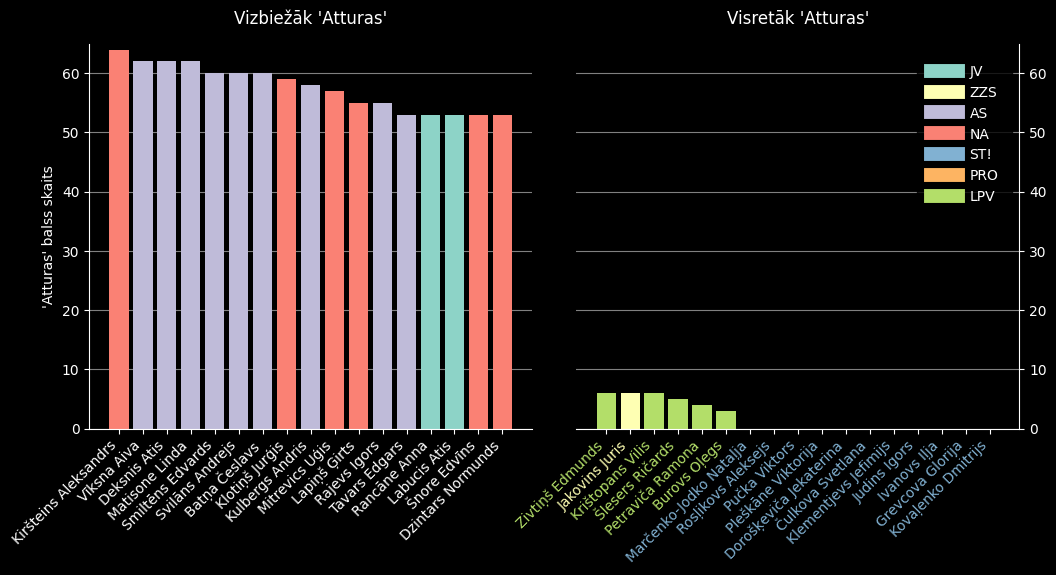

In [ ]:
##
## Visual NEW1
##

# Remove trivial deputati
deputati_relevant = np.copy(np.array(deputati))
for deputats in ['Tretjakova Nadežda', 'Skujiņa Zane',
                 'Mūrniece Ināra', 'Vitenbergs Jānis',
                 'Lībiņa-Egnere Inese', 'Rinkēvičs Edgars',
                 'Indriksone Ilze', 'Ašeradens Arvils',
                 'Kučinskis Māris', 'Čakša Anda',
                 'Puntulis Nauris', 'Siliņa Evika',
                 'Vitenbergs Jānis', 'Menģelsone Līga',
                 'Sprindžuks Māris', 'Šmits Didzis',
                 'Čudars Raimonds','Kariņš Arturs Krišjānis']:
    deputati_relevant = np.delete(deputati_relevant, np.where(deputati_relevant == deputats)[0])

# Collect data about par, pret, atturas, nebalsoja
balss_par = np.array([len(deputatu_balsojumi[deputats]['Par']) for deputats in deputati_relevant])
balss_pret = np.array([len(deputatu_balsojumi[deputats]['Pret']) for deputats in deputati_relevant])
balss_atturas = np.array([len(deputatu_balsojumi[deputats]['Atturas']) for deputats in deputati_relevant])
balss_nebalsoja = np.array([len(deputatu_balsojumi[deputats]['Nebalsoja']) for deputats in deputati_relevant])
balss_kopa = np.array([balss_par[d]+balss_pret[d]+balss_atturas[d]+balss_nebalsoja[d] for d in range(len(deputati_relevant))])
# ratio_nebalsoja = balss_nebalsoja/balss_kopa

# Sort and set cutoffs
sortindex = np.argsort(balss_atturas)
balss_atturas = np.sort(balss_atturas)
cutoff_worst = 17
cutoff_best = 17

with plt.style.context('dark_background'):
    fig, axes = plt.subplots(1,2,figsize=(12,5), width_ratios=[cutoff_worst/(cutoff_worst+cutoff_best), cutoff_best/(cutoff_worst+cutoff_best)])

    # Visbiežākais 'Nebalsoja'
    dep_worst = np.array(deputati_relevant)[sortindex][::-1][:cutoff_worst]
    ax = axes[0]
    ax.set_title('Vizbiežāk \'Atturas\'', y=1.03)
    ax.bar(range(cutoff_worst), balss_atturas[::-1][:cutoff_worst], color=[partijas_krasas_dark[deputata_partija[deputats]] for deputats in dep_worst], zorder=2)

    # Ticks
    ax.set_xticks(range(cutoff_worst))
    ax.set_xticklabels(dep_worst, rotation=45, ha='right')
    ax.set_ylabel('\'Atturas\' balss skaits')
    ax.spines[['top','right']].set_visible(False)
  # for i,deputats in enumerate(dep_worst):
  #   ax.get_xticklabels()[i].set_color(partijas_krasas_dark[deputata_partija[deputats]])

    # Visretākais 'Nebalsoja'
    dep_best = np.array(deputati_relevant)[sortindex][:cutoff_best][::-1]#[dep_order]
    ax = axes[1]
    ax.set_title('Visretāk \'Atturas\'', y=1.03)
    ax.bar(range(cutoff_best), balss_atturas[:cutoff_best][::-1], color=[partijas_krasas_dark[deputata_partija[deputats]] for deputats in dep_best], zorder=2)

    # Ticks
    ax.set_xticks(range(cutoff_best))
    ax.set_xticklabels(dep_best, rotation=45, ha='right')
    ax.yaxis.tick_right()
    ax.spines[['top','left']].set_visible(False)
    for i,deputats in enumerate(dep_best):
        ax.get_xticklabels()[i].set_color(partijas_krasas_dark[deputata_partija[deputats]])


    # Style
    for ax in axes:
        ax.set_ylim([0,65])
        ax.grid(axis='y', zorder=-2, color=(.5,.5,.5))

    # Custom legend
    legend_elements = [Line2D([0], [0], color=partijas_krasas_dark[partija], lw=10, label=partija) for partija in partijas[:-1]]
    axes[1].legend(handles=legend_elements, loc='upper right', ncol=1, frameon=True, facecolor=(0,0,0), edgecolor=(0,0,0,0), borderpad=1)#, bbox_to_anchor=(.02,1))

    # Show plot
    plt.subplots_adjust(wspace=.1)
    plt.show()

In [ ]:
 balss_atturas[np.where(deputati_relevant[sortindex] == 'Kiršteins Aleksandrs')[0][0]]

64

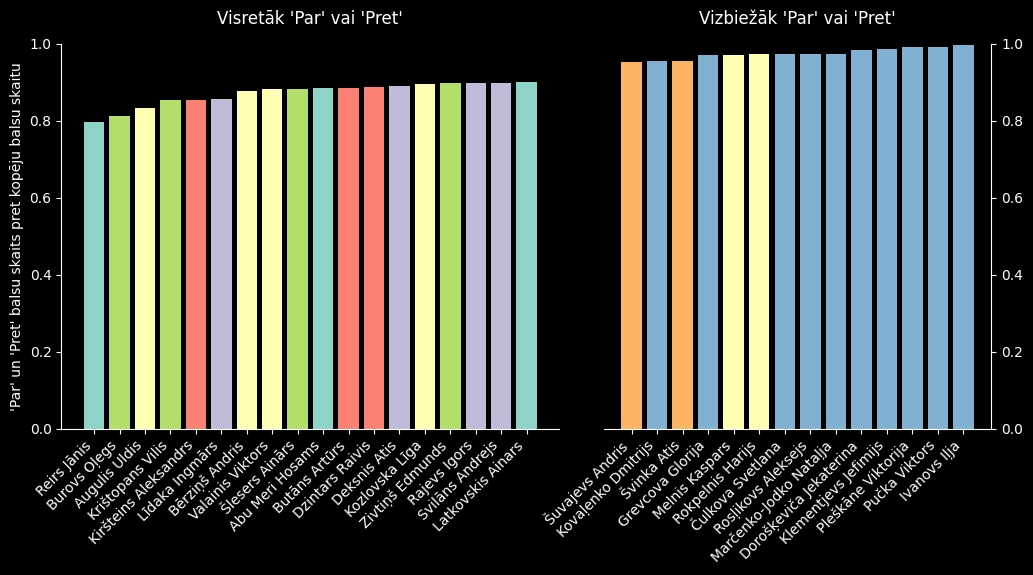

In [ ]:
##
## Visual NEW2
##

# Remove trivial deputati
deputati_relevant = np.copy(np.array(deputati))
for deputats in ['Tretjakova Nadežda', 'Skujiņa Zane',
                 'Mūrniece Ināra', 'Vitenbergs Jānis',
                 'Lībiņa-Egnere Inese', 'Rinkēvičs Edgars',
                 'Indriksone Ilze', 'Ašeradens Arvils',
                 'Kučinskis Māris', 'Čakša Anda',
                 'Puntulis Nauris', 'Siliņa Evika',
                 'Vitenbergs Jānis', 'Menģelsone Līga',
                 'Sprindžuks Māris', 'Šmits Didzis',
                 'Čudars Raimonds','Kariņš Arturs Krišjānis']:
    deputati_relevant = np.delete(deputati_relevant, np.where(deputati_relevant == deputats)[0])

# Collect data about par, pret, atturas, nebalsoja
balss_par = np.array([len(deputatu_balsojumi[deputats]['Par']) for deputats in deputati_relevant])
balss_pret = np.array([len(deputatu_balsojumi[deputats]['Pret']) for deputats in deputati_relevant])
balss_real = np.array([balss_par[d]+balss_pret[d] for d in range(len(deputati_relevant))])
balss_atturas = np.array([len(deputatu_balsojumi[deputats]['Atturas']) for deputats in deputati_relevant])
balss_nebalsoja = np.array([len(deputatu_balsojumi[deputats]['Nebalsoja']) for deputats in deputati_relevant])
balss_kopa = np.array([balss_par[d]+balss_pret[d]+balss_atturas[d]+balss_nebalsoja[d] for d in range(len(deputati_relevant))])
ratio_real = balss_real/balss_kopa

# Sort and set cutoffs
sortindex = np.argsort(ratio_real)
ratio_real = np.sort(ratio_real)
cutoff_worst = 14
cutoff_best = 18

with plt.style.context('dark_background'):
    fig, axes = plt.subplots(1,2,figsize=(12,5), width_ratios=[cutoff_best/(cutoff_worst+cutoff_best), cutoff_worst/(cutoff_worst+cutoff_best)])

    # Visretākais 'Nebalsoja'
    dep_best = np.array(deputati_relevant)[sortindex][:cutoff_best]#[dep_order]
    ax = axes[0]
    ax.set_title('Visretāk \'Par\' vai \'Pret\'', y=1.03)
    ax.bar(range(cutoff_best), ratio_real[:cutoff_best], color=[partijas_krasas_dark[deputata_partija[deputats]] for deputats in dep_best], zorder=2)

    # Ticks
    ax.set_xticks(range(cutoff_best))
    ax.set_xticklabels(dep_best, rotation=45, ha='right')
    ax.set_ylabel('\'Par\' un \'Pret\' balsu skaits pret kopēju balsu skaitu')
    ax.spines[['top','right']].set_visible(False)
  # for i,deputats in enumerate(dep_best):
  #   ax.get_xticklabels()[i].set_color(partijas_krasas_dark[deputata_partija[deputats]])

    # Visbiežākais 'Par' vai 'Pret'
    dep_worst = np.array(deputati_relevant)[sortindex][::-1][:cutoff_worst][::-1]
    ax = axes[1]
    ax.set_title('Vizbiežāk \'Par\' vai \'Pret\'', y=1.03)
    ax.bar(range(cutoff_worst), ratio_real[::-1][:cutoff_worst][::-1], color=[partijas_krasas_dark[deputata_partija[deputats]] for deputats in dep_worst], zorder=2)

    # Ticks
    ax.set_xticks(range(cutoff_worst))
    ax.set_xticklabels(dep_worst, rotation=45, ha='right')
    ax.yaxis.tick_right()
    ax.spines[['top','left']].set_visible(False)
  # for i,deputats in enumerate(dep_worst):
  #   ax.get_xticklabels()[i].set_color(partijas_krasas_dark[deputata_partija[deputats]])

    # Style
    for ax in axes:
        ax.set_ylim([0,1])
        # ax.grid(axis='y', zorder=-2)

  # Custom legend
  # legend_elements = [Line2D([0], [0], color=partijas_krasas_dark[partija], lw=10, label=partija) for partija in partijas[:-1]]
  # axes[1].legend(handles=legend_elements, loc='upper right', ncol=1, frameon=False)#, bbox_to_anchor=(.02,1))

    # Show plot
    plt.subplots_adjust(wspace=.1)
    plt.show()

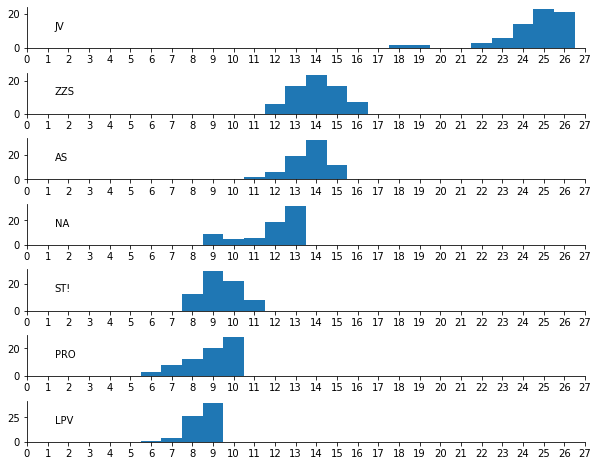

In [ ]:
##
## Visual 3a:
##  - type: histograms
##  - x-axis: number of 'deputati' present
##  - y-axis: count of how many times that happened
##
## Comments:
##  - Change the colors so that each histogram has the color of its party
##  - Add text saying what percentage of the 'balsojumi' were all eleceted members present

partijas_ieveleti = {'JV':26, 'ZZS':16, 'AS':15, 'NA':13, 'ST!':11, 'PRO':10, 'LPV':9}

# Collect data
partijas_counts = {partija:{} for partija in partijas}
for partija in partijas:
    count = {}
    for registracija in registracijas:
        df = registracijas_dataframes[registracija]
        current_index_partija = np.where(df['party']==partija)[0]
        current_index_registrejes = np.where(df['vote']=='Reģistrējies')[0]
        current_count = len(np.intersect1d(current_index_partija, current_index_registrejes))

        # Exclude trivial events
        if len(current_index_partija) > 2:
            if current_count in count.keys():
                count[current_count] += 1
            else:
                count[current_count] = 1

    current_keys = list(count.keys())
    current_keys.sort()
    count_sorted = {c:count[c] for c in current_keys[::-1]}
    partijas_counts[partija] = count

# Draw histograms
fig, axes = plt.subplots(7,1, figsize=(10,8))
xmax = 27

for ax,partija in zip(axes,['JV','ZZS','AS','NA','ST!','PRO','LPV']):
    ax.text(.05,.4,partija, ha='left', va='bottom', transform=ax.transAxes)
    count = []
    for number in partijas_counts[partija].keys():
        count += [number]*partijas_counts[partija][number]
    ax.hist(count, bins=[i-.5 for i in range(xmax+1)])
    ax.set_xlim([0,xmax])
    ax.set_xticks(range(xmax+1))

for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Show plot
plt.subplots_adjust(hspace=.6)
plt.show()

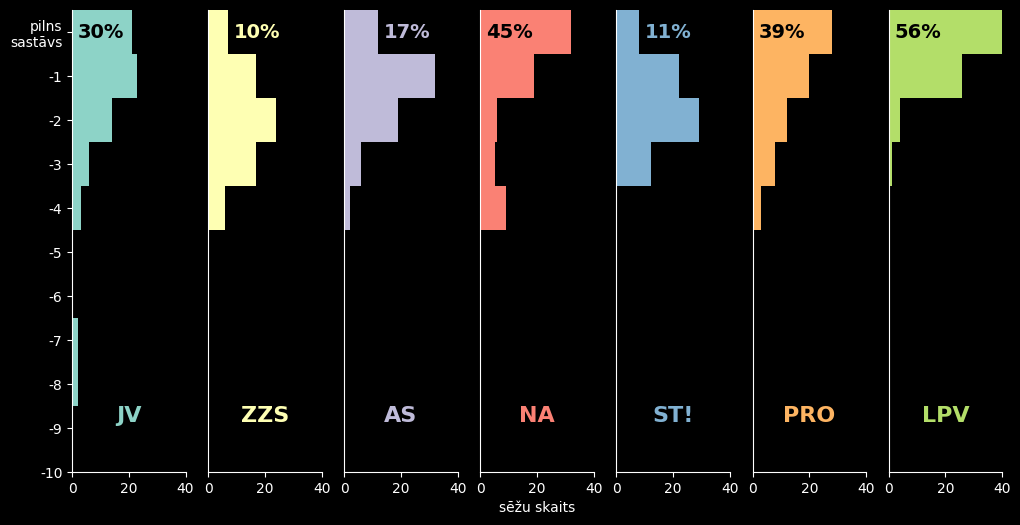

In [ ]:
##
## Visual 3aN
##

partijas_ieveleti = {'JV':26, 'ZZS':16, 'AS':15, 'NA':13, 'ST!':11, 'PRO':10, 'LPV':9}
partijas_sorted = ['JV','ZZS','AS','NA','ST!','PRO','LPV']

# Collect data
partijas_counts = {partija:{} for partija in partijas_sorted}
for partija in partijas_sorted:
    count = {i:0 for i in range(30)}
    for registracija in registracijas:
        df = registracijas_dataframes[registracija]
        current_index_partija = np.where(df['party']==partija)[0]
        current_index_registrejes = np.where(df['vote']=='Reģistrējies')[0]
        current_count = len(np.intersect1d(current_index_partija, current_index_registrejes))

        # Exclude trivial events
        if len(current_index_partija) > 2:
            count[current_count] += 1

    partijas_counts[partija] = count

# Draw histograms
with plt.style.context('dark_background'):
    fig, axes = plt.subplots(1, 7, figsize=(12,6))
    xmin = -10
    ymax = 40

    for ax,partija in zip(axes,partijas_sorted):

        # Compute and plot
        ax.barh(
            range(-9,1)[::-1],
            [partijas_counts[partija][partijas_ieveleti[partija]+i] for i in range(-9,1)[::-1]],
            color=partijas_krasas_dark[partija],
            height=1)

        # Text
        ax.text(.5, .1, partija, ha='center', va='bottom', transform=ax.transAxes, fontweight='bold', color=partijas_krasas_dark[partija], fontsize=16)
        if partija in ['JV','NA','PRO','LPV']:
            ax.text(2, 0,
              str(round(partijas_counts[partija][partijas_ieveleti[partija]]/71*100))+'%',
                                         ha='left', va='center', fontweight='bold', color=(0,0,0), fontsize=14)
        else:
            ax.text(partijas_counts[partija][partijas_ieveleti[partija]]+2, 0,
                                       str(round(partijas_counts[partija][partijas_ieveleti[partija]]/71*100))+'%',
                                         ha='left', va='center', fontweight='bold', color=partijas_krasas_dark[partija], fontsize=14)

        # Style
        ax.set_ylim([xmin,.5])
        ax.set_xlim([0,ymax])
        if partija == 'JV':
            ax.set_yticks(range(xmin,1))
            ax.set_yticklabels([str(i) for i in range(xmin,0)]+['pilns\nsastāvs'])
        else:
            ax.set_yticks([])
        if partija == 'NA':
            ax.set_xlabel('sēžu skaits')

    # Style
    for ax in axes:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    # Show plot
    plt.subplots_adjust(hspace=.6)
    plt.show()


In [ ]:
partijas_counts

{'JV': {25: 23, 24: 14, 23: 6, 26: 21, 22: 3, 18: 2, 19: 2},
 'ZZS': {15: 17, 12: 6, 13: 17, 14: 24, 16: 7},
 'AS': {15: 12, 13: 19, 12: 6, 14: 32, 11: 2},
 'NA': {12: 19, 13: 32, 11: 6, 9: 9, 10: 5},
 'ST!': {9: 29, 10: 22, 11: 8, 8: 12},
 'PRO': {10: 28, 8: 12, 7: 8, 9: 20, 6: 3},
 'LPV': {9: 40, 6: 1, 8: 26, 7: 4},
 ' ': {97: 1, 14: 3, 13: 1}}

In [ ]:
[sum([partijas_counts[partija][count] for count in partijas_counts[partija].keys()]) for partija in partijas_counts.keys()]

[71, 71, 71, 71, 71, 71, 71, 5]

TypeError: ignored

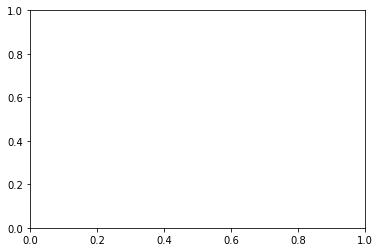

In [ ]:
##
## Visual 3b:
##  - type: violin plots
##  - x-axis: parties
##  - y-axis: number relative to max registered for every 'sede'

fig = plt.figure()
ax = plt.gca()

# Custom order for visual impression
partijas = ['LPV','ST!','AS','PRO','NA','ZZS','JV']

# Collect data (excluding empty party)
relative = {partija:[] for partija in partijas}
for partija in partijas:
    partija_max = partijas_ieveleti[partija]
    for count in partijas_counts[partija].keys():
        relative[partija] += [count-partija_max]*partijas_counts[partija][count]

# Plot data
# ax.set_title('How many deputāti skip sēdes from each party?', fontsize=14)
ax.violinplot([relative[partija] for partija in partijas], c=[partijas_krasas[partija] for partija in partijas])

# Style x-axis
ax.set_xlabel('Political party', color=(.5,.5,.5))
ax.set_xticks(range(1,8))
ax.set_xticklabels(partijas)

# Style y-axis
ax.set_ylabel('Number of deputati missing', color=(.5,.5,.5))
# ax.set_ylim([.5,1.01])
# ax.set_yticks([i/10 for i in range(5,11)])
# ax.set_yticklabels([str(i*10)+'%' for i in range(5,11)])

# Style data
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show plot
plt.show()

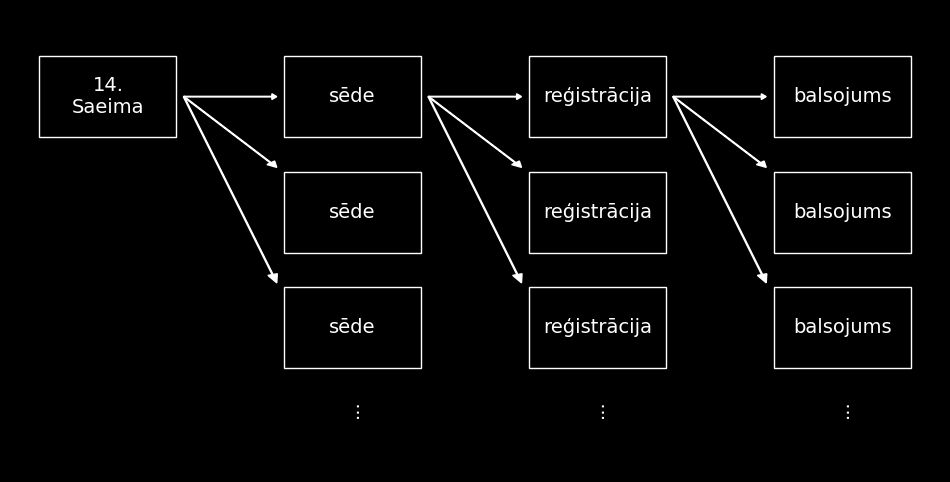

In [ ]:
##
## Visual NEW3
##

# Set parameters
hstart = .1
hsp = .25
vstart = .7
vsp = .2
bwidth = .14
bheight = .14
arrowpad = .015
ahw = .01
ahl = .005

with plt.style.context('dark_background'):
    fig = plt.figure(figsize=(12,6))
    ax = plt.gca()

    # First text
    ax.text(hstart,vstart,'14.\nSaeima',color=(1,1,1), fontsize=14, ha='center', va='center')
    rect = Rectangle((hstart-bwidth/2, vstart-bheight/2), bwidth, bheight, linewidth=1, edgecolor='w', facecolor='none')
    ax.add_patch(rect)

    for y in [0,1,2]:

        # Text
        ax.text(hstart+hsp, vstart-y*vsp, 'sēde', color=(1,1,1), fontsize=14, ha='center', va='center')
        ax.text(hstart+2*hsp, vstart-y*vsp,'reģistrācija', color=(1,1,1), fontsize=14, ha='center', va='center')
        ax.text(hstart+3*hsp, vstart-y*vsp,'balsojums', color=(1,1,1), fontsize=14, ha='center', va='center')
        ax.text(hstart+(y+1)*hsp, vstart-2.7*vsp,'...', color=(1,1,1), fontsize=14, ha='center', va='center', rotation=90)

        for x in [1,2,3]:

            # Rectangles
            rect = Rectangle((hstart+x*hsp-bwidth/2, vstart-y*vsp-bheight/2), bwidth, bheight, linewidth=1, edgecolor='w', facecolor='none')
            ax.add_patch(rect)

            # Arrows
            ax.arrow(
                hstart+(x-1)*hsp+bwidth/2+arrowpad/2,
                vstart,
                hsp-bwidth-arrowpad,#+(arrowpad/2 if y else 0),
                -y*vsp+(bheight/2+arrowpad/2 if y else 0),
                length_includes_head=True, head_width=ahw, head_length=ahl+y/200, facecolor='w')


    # Style
    ax.axis('off')
    ax.set_xlim([0,.95])
    ax.set_ylim([0.05,.85])

    # Show plot
    plt.show()

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  figure: `.Figure`
  gid: str
  in_layout: bool
  label: str
  label1: str
  label2: str
  mouseover: bool
  pad: float
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  rasterized: bool
  sketch_params: (scale: float, length: float, randomness: float)
  snap: bool or None
  transform: `.Transform`
  url: str
  visible: bool
  zorder: float
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip

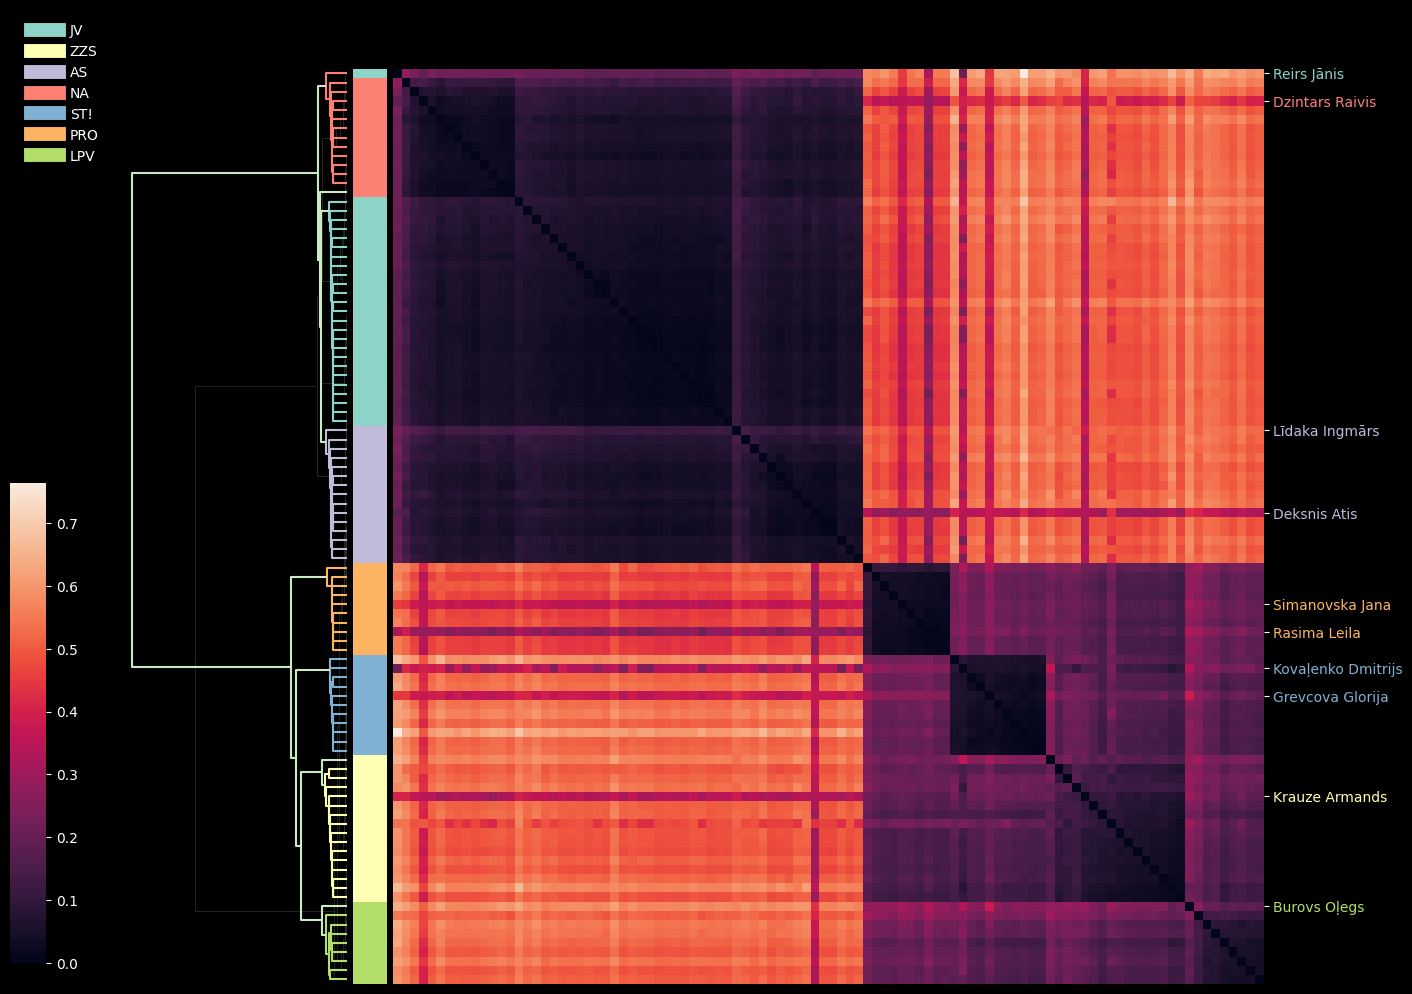

In [ ]:
##
## Visual NEW4
##

recompute = False

if recompute:
    # Remove trivial deputati
    deputati_relevant = np.copy(np.array(deputati))
    for deputats in ['Tretjakova Nadežda', 'Skujiņa Zane',
                 'Mūrniece Ināra', 'Vitenbergs Jānis',
                 'Lībiņa-Egnere Inese', 'Rinkēvičs Edgars',
                 'Indriksone Ilze', 'Ašeradens Arvils',
                 'Kučinskis Māris', 'Čakša Anda',
                 'Puntulis Nauris', 'Siliņa Evika',
                 'Vitenbergs Jānis', 'Menģelsone Līga',
                 'Sprindžuks Māris', 'Šmits Didzis',
                 'Čudars Raimonds','Kariņš Arturs Krišjānis']:
        deputati_relevant = np.delete(deputati_relevant, np.where(deputati_relevant == deputats)[0])

    # Compute distances
    M = np.zeros((len(deputati_relevant),len(deputati_relevant)))
    for i,dep1 in enumerate(deputati_relevant):
        for j,dep2 in enumerate(deputati_relevant):
            d1n,d1a,d1pa,d1pr = (np.array(deputatu_balsojumi[dep1]['Nebalsoja']), np.array(deputatu_balsojumi[dep1]['Atturas']),
                           np.array(deputatu_balsojumi[dep1]['Par']), np.array(deputatu_balsojumi[dep1]['Pret']))
            d2n,d2a,d2pa,d2pr = (np.array(deputatu_balsojumi[dep2]['Nebalsoja']), np.array(deputatu_balsojumi[dep2]['Atturas']),
                           np.array(deputatu_balsojumi[dep2]['Par']), np.array(deputatu_balsojumi[dep2]['Pret']))
            common = np.intersect1d(np.hstack((d1n,d1a,d1pa,d1pr)), np.hstack((d2n,d2a,d2pa,d2pr)))
            cn,ca,cpa,cpr = (np.intersect1d(d1n,d2n), np.intersect1d(d1a,d2a), np.intersect1d(d1pa,d2pa), np.intersect1d(d1pr,d2pr))
            entry = 1-(sum([len(arr) for arr in [cn,ca,cpa,cpr]]))/len(common)
            M[i][j] = entry

with plt.style.context('dark_background'):
  # fig = plt.figure(figsize=(12,6))
  # ax = plt.gca()

  # Colors
  # df_colors = pd.DataFrame(data={'r': row_colors[row_colors == 'r'], 'g': row_colors[row_colors == 'g'], 'b': row_colors[row_colors == 'b']})

    # Plot heatmap
    dist_array = ssd.squareform(M)
    M2 = hierarchy.linkage(dist_array, method='ward')
    M3 = hierarchy.linkage(np.add(dist_array,.3*np.ones_like(dist_array)), method='ward')
    heat = sns.clustermap(
        M,
        row_linkage=M2,
        col_linkage=M2,
        row_colors=[partijas_krasas_dark[deputata_partija[dep]] for dep in deputati_relevant],
        yticklabels=1,
        cbar_pos = (-.08, .05, .03, .4),
        dendrogram_ratio=.2,
        figsize=(12,12)
      )
    hierarchy.set_link_color_palette(['C6','C1','C4','C5','C2','C0','C3','C7','C8'])
    den = hierarchy.dendrogram(M3,
                          color_threshold=.52, distance_sort='descending', ax=heat.ax_row_dendrogram, orientation='left',
                          above_threshold_color='C8'
                           )

    # Hide top dendrogram
    heat.ax_col_dendrogram.set_visible(False)

    # Labels
    heat.ax_heatmap.set_xticks([])

    tick_showindex = [np.where(deputati_relevant == name)[0][0] for name in [
      'Dzintars Raivis', 'Deksnis Atis', 'Simanovska Jana', 'Rasima Leila', 'Kovaļenko Dmitrijs',
      'Grevcova Glorija', 'Krauze Armands', 'Reirs Jānis', 'Līdaka Ingmārs', 'Burovs Oļegs']]
    tick_shownames = [deputati_relevant[index] for index in tick_showindex]
    reorder = heat.dendrogram_row.reordered_ind
    new_positions = [reorder.index(i) for i in tick_showindex]
    plt.setp(heat.ax_heatmap.yaxis.set_ticks([x+.5 for x in new_positions]))
    plt.setp(heat.ax_heatmap.yaxis.set_ticklabels(tick_shownames))

    # Deputatu krasas
    for dep in heat.ax_heatmap.get_yticklabels():
        dep.set_color(partijas_krasas_dark[deputata_partija[dep.get_text()]])

    # Custom legend
    legend_elements = [Line2D([0], [0], color=partijas_krasas_dark[partija], lw=10, label=partija) for partija in partijas[:-1]]
    plt.gca().legend(handles=legend_elements, loc='upper left', ncol=1, frameon=True, facecolor=(0,0,0), edgecolor=(0,0,0,0), borderpad=1, bbox_to_anchor=(0,2))

    # Show plot
    plt.show()